## Multi-seed test

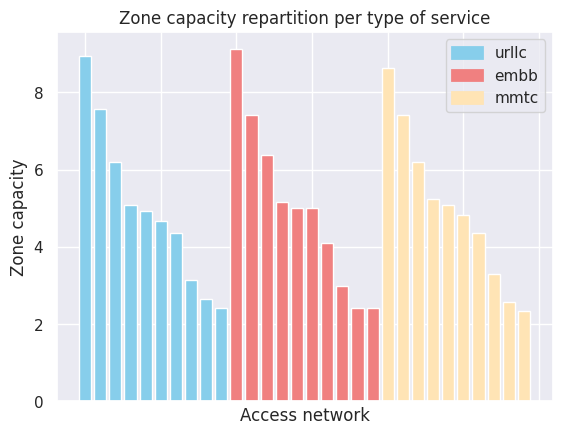

In [2]:
from plot_topology import plot_type_capacity
from pathlib import Path

no_reput = Path(f"../results/fuzzy/base/no_reput")
exponential = Path(f"../results/fuzzy/base/exponential")
outpath  ='../plotter/fuzzy/capacity_30_seeds.pdf'

plot_type_capacity(no_reput ,"Zone capacity repartition per type of service", multiseed=True, outpath=outpath)
# plot_type_capacity(exponential ,"Zone capacity repartition per type of service", multiseed=True)


## Type capacity per an 

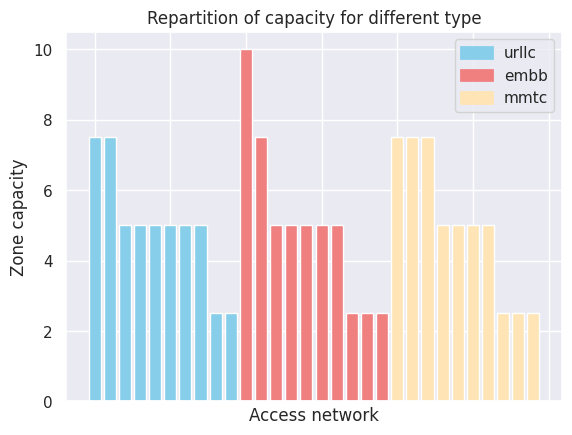

In [4]:
from pathlib import Path
p = Path("../results/multirun/2024-05-24/15-08-56/1")
plot_type_capacity(p ,"Repartition of capacity for different type")

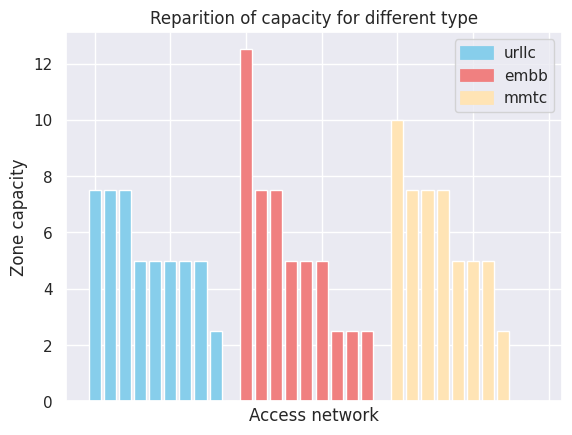

In [2]:
from pathlib import Path
p = Path("../results/run/2024-05-21/15-29-15")
plot_type_capacity(p ,"Reparition of capacity for different type")

Analyse du graph précédent: 
- Certaines zones n'ont aucune capacité pour un type de service donné ce qui provoque forcément un service de mauvaise qualité quand ce services est mobilisé dans la zone. 

Pistes de solution : 
- "Seeder" le positionnement des pairs dans les zones pour s'assurer que chaque zone ait au moins un pair de chaque type.

## Capacity for each peer in an experiment

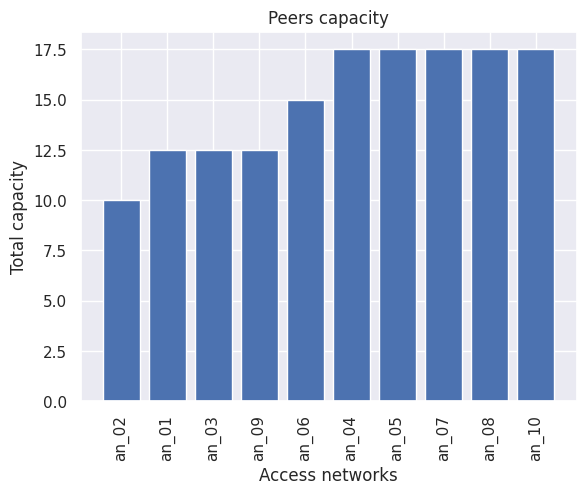

In [3]:
from plot_topology import plot_max_capacity
from pathlib import Path
p = Path("../results/run/2024-05-21/15-29-15")
plot_max_capacity(p ,"Ans total capacity")

## Tuning topology 

In [ ]:
import tabulate
from pathlib import Path
from plot_utils import load_total_positive,load_total_negative,load_total_negative,load_total_interactions

p_no_topo =  Path("")
p_topo = Path("")
# p_fuzzy_no_reput = Path("../results/run/2024-04-12/11-34-45")
# ../results/run/2024-04-25/15-02-08/
# p_fuzzy_denser_reput = Path("../results/run/2024-04-12/13-15-10")
p_fuzzy_reput = Path("../results/run/2024-04-25/15-02-08/")
p_fuzzy = Path("../results/run/2024-05-17/13-46-40")
data = [ ["","Successes","Failures","Total", "Ratio (%)"],
        #  ["No topology implemented",load_total_positive(p_no_topo),load_total_negative(p_no_topo),load_total_interactions(p_no_topo), round( 100* load_total_negative(p_no_topo)/load_total_interactions(p_no_topo),2) ],
        #  ["Before fuzzy",load_total_positive(p_topo),load_total_negative(p_topo),load_total_interactions(p_topo),round( 100* load_total_negative(p_topo)/load_total_interactions(p_topo),2)],
        #  ["Fuzzy no reput",load_total_positive(p_fuzzy_no_reput),load_total_negative(p_fuzzy_no_reput),load_total_interactions(p_fuzzy_no_reput),round( 100* load_total_negative(p_fuzzy_no_reput)/load_total_interactions(p_fuzzy_no_reput),2)],
         ["Fuzzy initial",load_total_positive(p_fuzzy_reput),load_total_negative(p_fuzzy_reput),load_total_interactions(p_fuzzy_reput),round( 100* load_total_negative(p_fuzzy_reput)/load_total_interactions(p_fuzzy_reput),2)],
         ["Fuzzy with density adjustment",load_total_positive(p_fuzzy),load_total_negative(p_fuzzy),load_total_interactions(p_fuzzy),round( 100* load_total_negative(p_fuzzy)/load_total_interactions(p_fuzzy),2)],

         ]
table = tabulate.tabulate(data, tablefmt='html')
table

,Successes,Failures,Total,Ratio (%)
Fuzzy initial,1905,94,1999,4.7
Fuzzy with density adjustment,2532,468,3000,15.6


In [ ]:
import tabulate
from pathlib import Path
from plot_utils import load_total_positive,load_total_negative,load_total_negative,load_total_interactions

p_no_topo =  Path("")
p_topo = Path("")

# p_fuzzy_denser = Path("../results/run/2024-05-17/10-18-30")
# p_fuzzy_denser = Path("../results/run/2024-05-17/10-36-33")
p_fuzzy = Path("../results/run/2024-05-17/11-49-29")
p_fuzzy_longer = Path("../results/run/2024-05-17/12-33-36")
p_fuzzy_denser = Path("../results/run/2024-05-21/15-29-15")
p_fuzzy_self_selection= Path("../results/run/2024-05-23/17-36-25")
data = [ ["","Successes","Failures","Failure ratio (%)","Expected failures", "Ratio (%) of expected failures","Total" ],
         ["Fuzzy",load_total_positive(p_fuzzy),load_total_negative(p_fuzzy),round( 100* load_total_negative(p_fuzzy)/load_total_interactions(p_fuzzy),2),load_total_negative(p_fuzzy,expected=True),round( 100* load_total_negative(p_fuzzy,expected=True)/load_total_negative(p_fuzzy),ndigits=2),load_total_interactions(p_fuzzy)],
         ["Fuzzy with more transactions",load_total_positive(p_fuzzy_longer),load_total_negative(p_fuzzy_longer),round( 100* load_total_negative(p_fuzzy_longer)/load_total_interactions(p_fuzzy_longer),2),load_total_negative(p_fuzzy_longer,expected=True),round( 100* load_total_negative(p_fuzzy_longer,expected=True)/load_total_negative(p_fuzzy_longer),ndigits=2),load_total_interactions(p_fuzzy_longer)],
         ["Fuzzy test",load_total_positive(p_fuzzy_denser),load_total_negative(p_fuzzy_denser),round( 100* load_total_negative(p_fuzzy_denser)/load_total_interactions(p_fuzzy_denser),2),load_total_negative(p_fuzzy_denser,expected=True),round( 100* load_total_negative(p_fuzzy_denser,expected=True)/load_total_negative(p_fuzzy_denser),ndigits=2),load_total_interactions(p_fuzzy_denser)],
         ["Fuzzy with self selection allowed",load_total_positive(p_fuzzy_self_selection),load_total_negative(p_fuzzy_self_selection),round( 100* load_total_negative(p_fuzzy_self_selection)/load_total_interactions(p_fuzzy_self_selection),2),load_total_negative(p_fuzzy_self_selection,expected=True),round( 100* load_total_negative(p_fuzzy_self_selection,expected=True)/load_total_negative(p_fuzzy_self_selection),ndigits=2),load_total_interactions(p_fuzzy_self_selection)],

         ]
table = tabulate.tabulate(data, tablefmt='html')
table

,Successes,Failures,Failure ratio (%),Expected failures,Ratio (%) of expected failures,Total
Fuzzy,501,239,32.3,121,50.63,740
Fuzzy with more transactions,2187,747,25.46,634,84.87,2934
Fuzzy test,590,160,21.33,50,31.25,750
Fuzzy with self selection allowed,608,142,18.93,25,17.61,750


### Comparing different AN numbers

In [ ]:
import tabulate
from pathlib import Path
from plot_utils import load_total_positive,load_total_negative,load_total_negative,load_total_interactions


exponential = Path("../results/run/2024-05-17/3-an")
p_4an = Path("../results/run/2024-05-17/4-an")
p_5an = Path("../results/run/2024-05-17/5-an")

data = [ ["","Successes","Failures","Failure ratio (%)","Expected failures", "Ratio (%) of expected failures","Total" ],
         ["Fuzzy 3 an per peer",load_total_positive(exponential),load_total_negative(exponential),round( 100* load_total_negative(exponential)/load_total_interactions(exponential),2),load_total_negative(exponential,expected=True),round( 100* load_total_negative(exponential,expected=True)/load_total_negative(exponential),ndigits=2),load_total_interactions(exponential)],
         ["Fuzzy 4 an per peer",load_total_positive(p_4an),load_total_negative(p_4an),round( 100* load_total_negative(p_4an)/load_total_interactions(p_4an),2),load_total_negative(p_4an,expected=True),round( 100* load_total_negative(p_4an,expected=True)/load_total_negative(p_4an),ndigits=2),load_total_interactions(p_4an)],
         ["Fuzzy 5 an per peer",load_total_positive(p_5an),load_total_negative(p_5an),round( 100* load_total_negative(p_5an)/load_total_interactions(p_5an),2),load_total_negative(p_5an,expected=True),round( 100* load_total_negative(p_5an,expected=True)/load_total_negative(p_5an),ndigits=2),load_total_interactions(p_5an)],

         ]
table = tabulate.tabulate(data, tablefmt='html')
table

,Successes,Failures,Failure ratio (%),Expected failures,Ratio (%) of expected failures,Total
Fuzzy 3 an per peer,2149,820,27.62,445,54.27,2969
Fuzzy 4 an per peer,2558,442,14.73,182,41.18,3000
Fuzzy 5 an per peer,2467,533,17.77,158,29.64,3000
